In [1]:
import diffuser.utils as utils

pybullet build time: Nov 28 2023 23:51:11


In [2]:
class Args:
  loadpath = 'logs/pretrained/hopper-medium-expert-v2/diffusion/defaults_H32_T20'
  diffusion_epoch = 'latest'
  n_samples = 4
  device = 'cuda:0'
    
args = Args()

In [3]:
%cd /home/ae21b026/diffuser

/home/ae21b026/diffuser


In [4]:

diffusion_experiment = utils.load_diffusion(
    args.loadpath, epoch=args.diffusion_epoch)

dataset = diffusion_experiment.dataset
renderer = diffusion_experiment.renderer
model = diffusion_experiment.trainer.ema_model

[ utils/serialization ] Loaded config from logs/pretrained/hopper-medium-expert-v2/diffusion/defaults_H32_T20/dataset_config.pkl

[utils/config ] Config: <class 'diffuser.datasets.sequence.SequenceDataset'>
    env: hopper-medium-expert-v2
    horizon: 32
    max_path_length: 1000
    normalizer: GaussianNormalizer
    preprocess_fns: []
    use_padding: True

[ utils/serialization ] Loaded config from logs/pretrained/hopper-medium-expert-v2/diffusion/defaults_H32_T20/render_config.pkl

[utils/config ] Config: <class 'diffuser.utils.rendering.MuJoCoRenderer'>
    env: hopper-medium-expert-v2

[ utils/serialization ] Loaded config from logs/pretrained/hopper-medium-expert-v2/diffusion/defaults_H32_T20/model_config.pkl

[utils/config ] Config: <class 'diffuser.models.temporal.TemporalUnet'>
    attention: False
    cond_dim: 11
    dim_mults: (1, 2, 4, 8)
    horizon: 32
    transition_dim: 14

[ utils/serialization ] Loaded config from logs/pretrained/hopper-medium-expert-v2/diffusion/d

load datafile: 100%|██████████| 9/9 [00:02<00:00,  3.54it/s]


[ datasets/buffer ] Finalized replay buffer | 3213 episodes
[ datasets/buffer ] Fields:
    actions: (3213, 1000, 3)
    infos/action_log_probs: (3213, 1000, 1)
    infos/qpos: (3213, 1000, 6)
    infos/qvel: (3213, 1000, 6)
    next_observations: (3213, 1000, 11)
    observations: (3213, 1000, 11)
    rewards: (3213, 1000, 1)
    terminals: (3213, 1000, 1)
    timeouts: (3213, 1000, 1)
    normed_observations: (3213, 1000, 11)
    normed_actions: (3213, 1000, 3)
[ models/temporal ] Channel dimensions: [(14, 32), (32, 64), (64, 128), (128, 256)]
[(14, 32), (32, 64), (64, 128), (128, 256)]
torch.Size([32, 14])

[ utils/serialization ] Loading model epoch: 800000



/home/ae21b026/diffuser/diffuser/utils/training.py:157: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(loadpath)


In [5]:
env = dataset.env
obs = env.reset()

In [6]:
diffusion_chain = utils.colab.run_diffusion(
    model, dataset, obs, args.n_samples, args.device
)
print(diffusion_chain.shape)

(21, 4, 32, 11)


In [7]:
samples = diffusion_chain[-1]
utils.colab.show_sample(renderer, samples)

In [8]:
utils.colab.show_diffusion(renderer, diffusion_chain[:,:1], substep=1)

100%|██████████| 21/21 [00:14<00:00,  1.47it/s]


In [9]:
horizons = [16, 128, 256, 512, 1024]
diffusion_chains = [
      utils.colab.run_diffusion(
          model, dataset, obs, n_samples=1, device=args.device, horizon=horizon
      )
      for horizon in horizons
]

for horizon, diffusion_chain in zip(horizons, diffusion_chains):
  print(f'horizon = {horizon} | samples shape = {diffusion_chain.shape}')

horizon = 16 | samples shape = (21, 1, 16, 11)
horizon = 128 | samples shape = (21, 1, 128, 11)
horizon = 256 | samples shape = (21, 1, 256, 11)
horizon = 512 | samples shape = (21, 1, 512, 11)
horizon = 1024 | samples shape = (21, 1, 1024, 11)


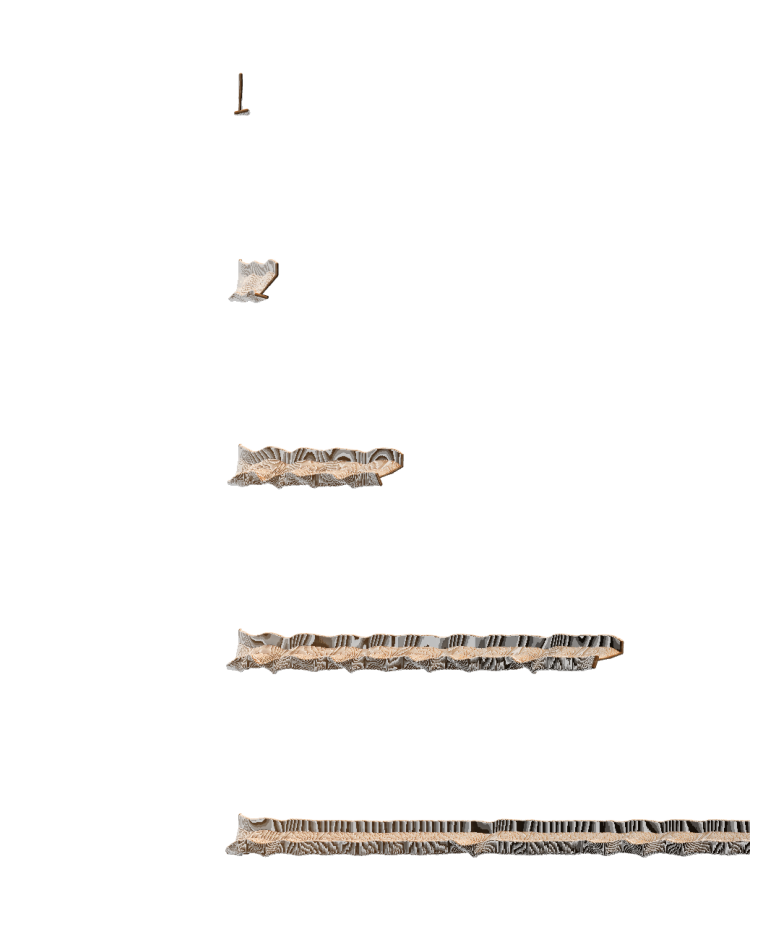

In [10]:
utils.colab.show_samples(renderer, diffusion_chains)

In [ ]:
utils.colab.show_diffusion(renderer, diffusion_chains[-1][:,:1], substep=1)